### Imports

In [1]:
import glob
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
from scipy.stats import variation
from sklearn.preprocessing import normalize

### Load distance dataframes

In [2]:
distancesDir = 'decade_distances_complete/*.pickle'
distances_raw = []
for name in glob.glob(distancesDir):
    year = int(name[26:30])
    with open(name, 'rb') as f:
        distances_raw.append((year, pickle.load(f)))
        f.close()

distances = [(yr, df) for yr, df in distances_raw if yr >= 1880 and yr <= 1945]
distances.sort(key=lambda i: i[0])

### Functions

In [5]:
!mkdir distribution_imgs
def graphDistribution(yr, df, cat, saveFolder=None):
    fig, ax = plt.subplots()
    ax.hist(df[cat], bins=50, color='grey', edgecolor='black')
    if saveFolder is not None:
        fileName = saveFolder + str(yr) + '_' + cat.upper() + '.png'
        plt.savefig(fileName)
        
    plt.show()

mkdir: cannot create directory ‘distribution_imgs’: File exists


  0%|          | 0/13 [00:00<?, ?it/s]

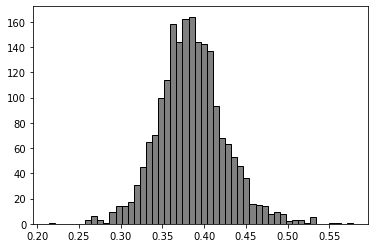

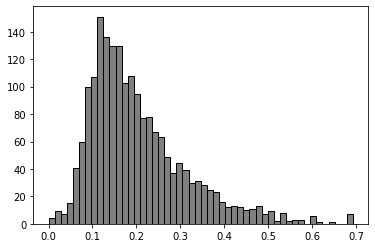

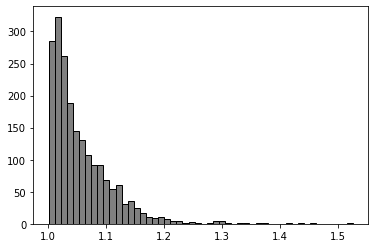

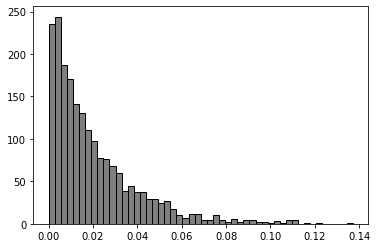

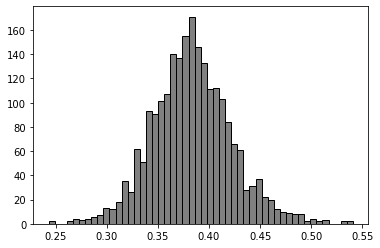

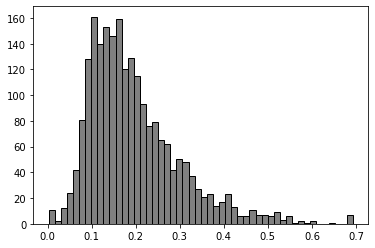

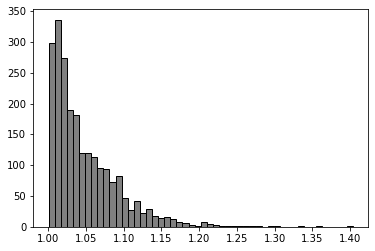

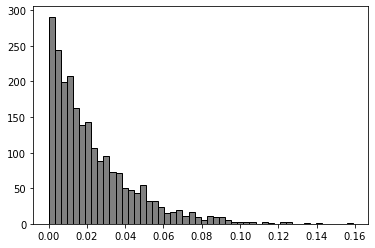

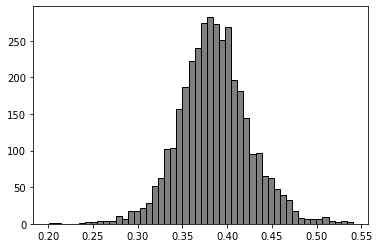

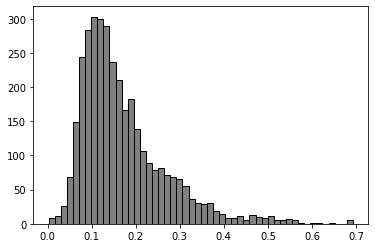

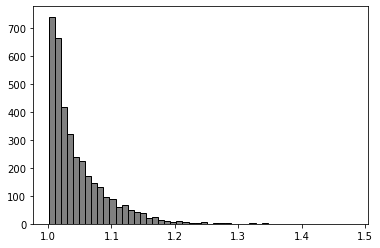

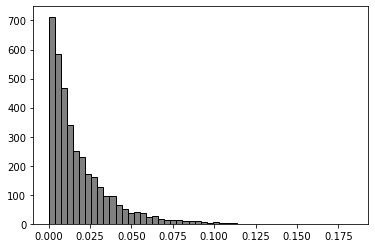

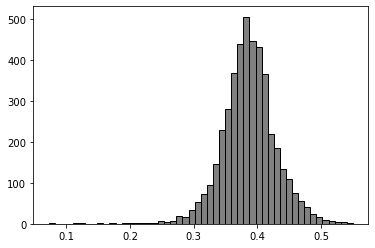

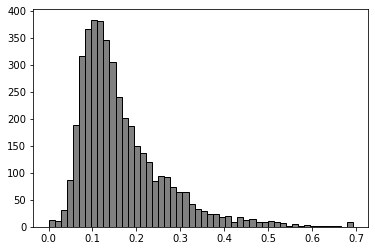

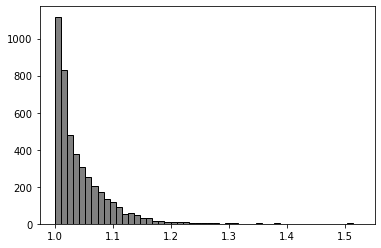

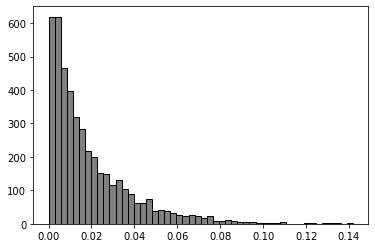

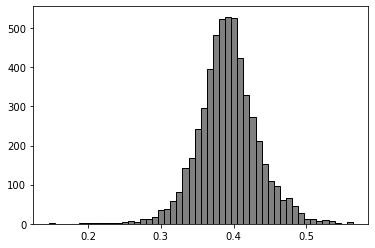

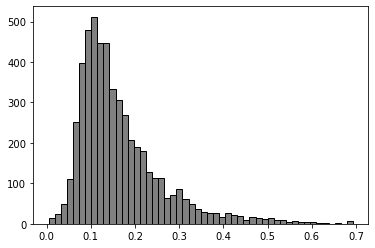

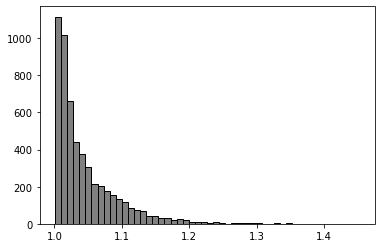

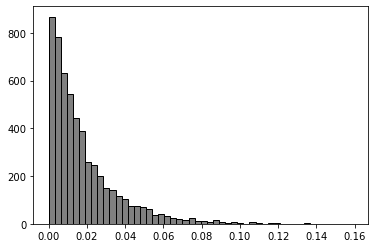

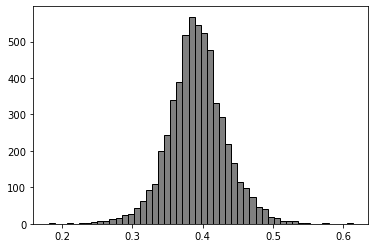

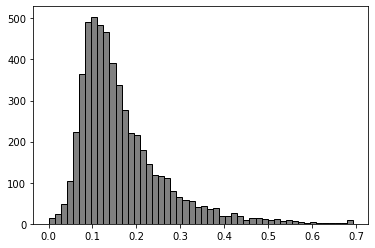

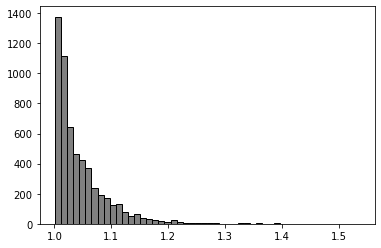

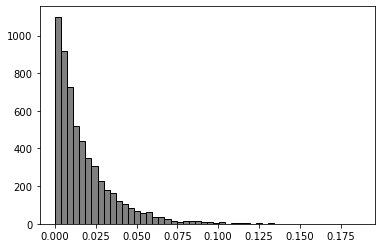

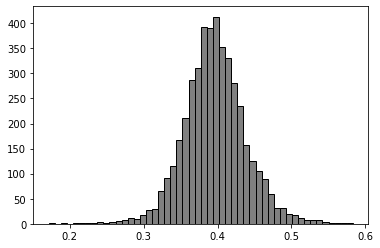

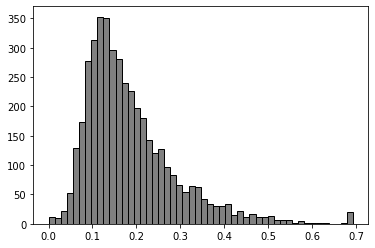

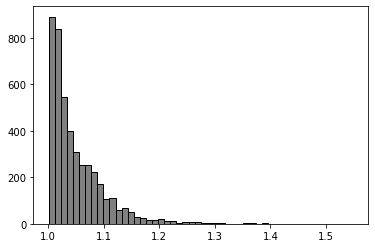

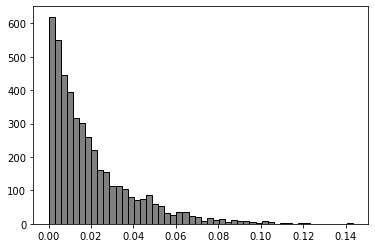

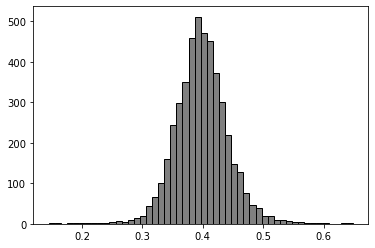

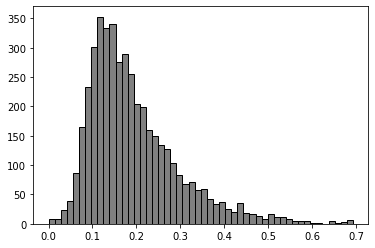

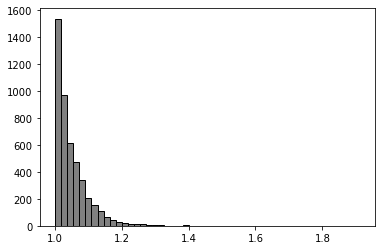

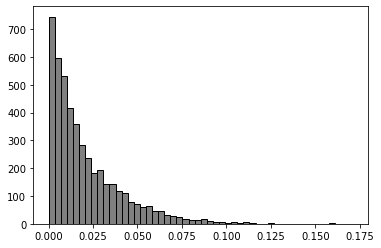

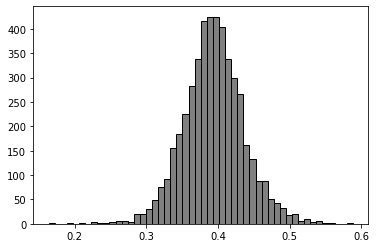

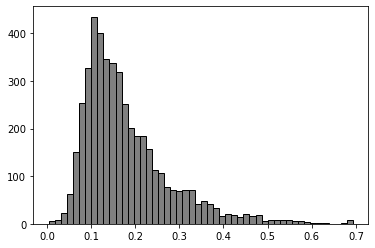

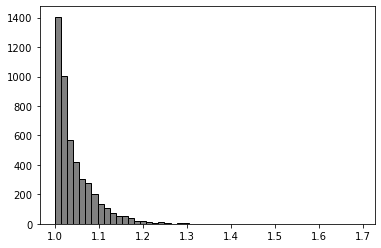

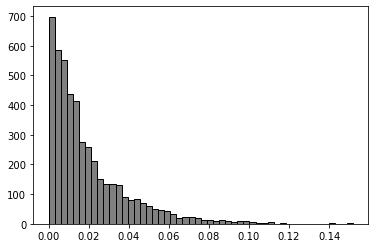

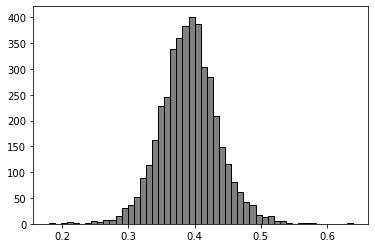

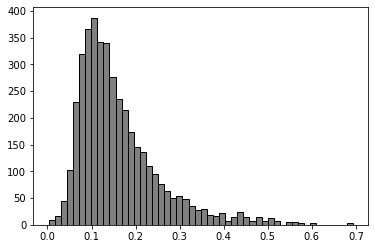

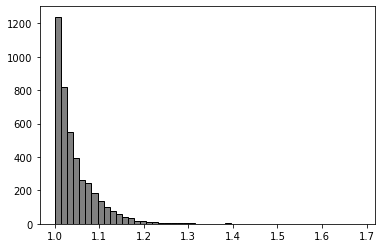

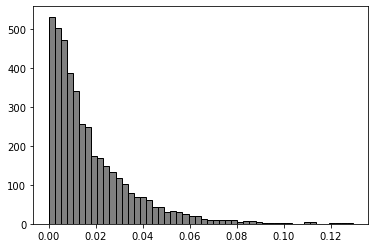

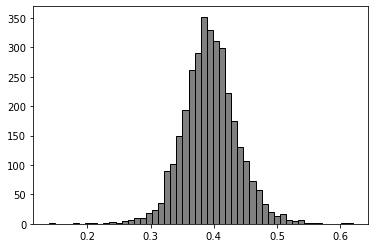

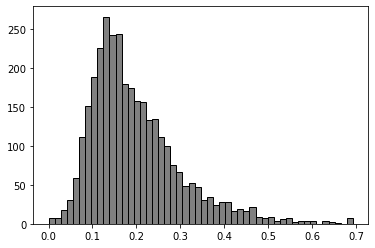

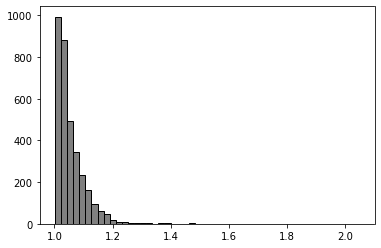

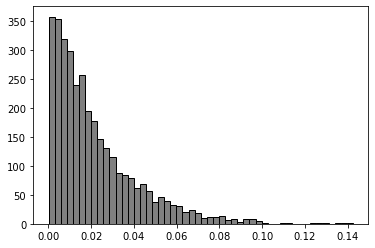

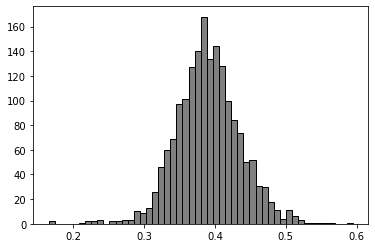

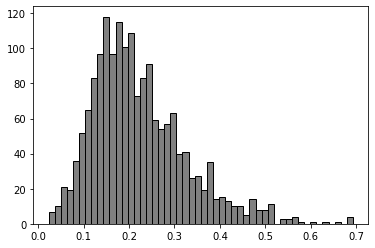

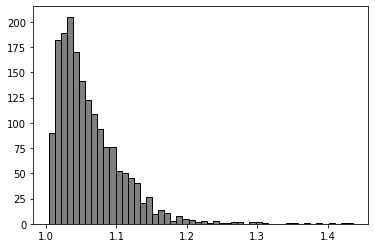

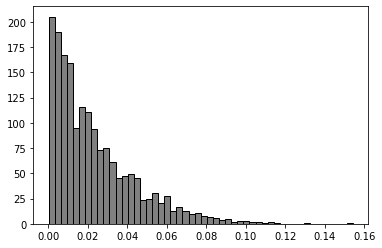

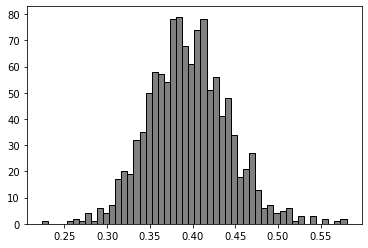

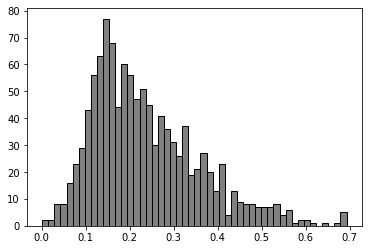

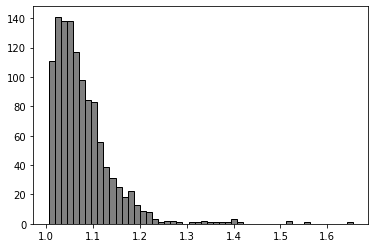

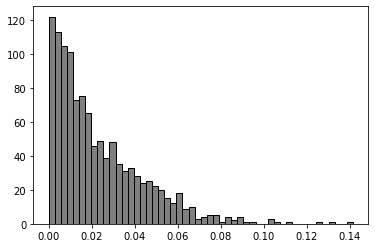

In [6]:
cats = ['apd', 'jsd', 'prt', 'div']
imgsdir = 'distribution_imgs/'
for yr, df in tqdm(distances):
    for cat in cats:
        graphDistribution(yr, df, cat, saveFolder=imgsdir)